# Examen Módulo 2

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

# ANTES DE EMPEZAR

Escribe tu número de expediente como semilla

In [1]:
import numpy as np
np.random.seed(742477)
print("Integración Monte Carlo tipo 1 - Problema ", np.random.choice([1, 2]))
print("Integración Monte Carlo tipo 2 - Problema ", np.random.choice([1, 2]))

Integración Monte Carlo tipo 1 - Problema  2
Integración Monte Carlo tipo 2 - Problema  1


---
### Caminata aleatoria

Una persona entra a un casino con 20 pesos.

Su apuesta inicial es de 10 pesos, y tiene la idea de modificar su apuesta de la siguiente manera:
- Si gana, disminuye su apuesta en 2 pesos
- Si pierde, aumenta su apuesta en 2 pesos

Este jugador apostará hasta que haya ganado lo suficiente para que su apuesta se vuelva 0 o cuando quede en bancarrota.

1. ¿Cuál es el capital esperado?
2. En promedio, ¿cuánto apostará en el tercer juego?
3. ¿Cuál es la probabilidad de que quede en bancarrota?
4. ¿Cuál es la probabilidad de que "gane"? (Que su apuesta se vuelva cero)

In [34]:
import numpy as np

capital_inicial = 20
apuesta_inicial = 10
prob_ganar = 0.5
n = 10000

def simular_juego():
    capital = capital_inicial
    apuesta = apuesta_inicial
    juegos = 0
    while capital > 0 and apuesta > 0:
        if np.random.random() < prob_ganar:
            capital += apuesta
            apuesta -= 2
        else:
            capital -= apuesta
            apuesta += 2
        juegos += 1
    return capital, juegos, apuesta_inicial <= apuesta == 0


In [46]:
capital_finales = []
apuestas_tercer_juego = []
bancarrota = 0
gana = 0

for _ in range(n):
    capital, juegos, gano = simular_juego()
    capital_finales.append(capital)
    if juegos >= 3:
        apuestas_tercer_juego.append(apuesta_inicial)
    if capital <= 0:
        bancarrota += 1
    if gano:
        gana += 1

capital_esperado = np.mean(capital_finales)
apuesta_promedio_tercer_juego = np.mean(apuestas_tercer_juego)
probabilidad_bancarrota = bancarrota / n
probabilidad_ganar = gana / n

In [38]:
capital_esperado

19.769

In [40]:
apuesta_promedio_tercer_juego

10.0

In [42]:
probabilidad_bancarrota

0.661

In [44]:
probabilidad_ganar


0.0

---
### Simulación Monte Carlo

Jugadores A y B están jugando a tirar una moneda sesgada (60\% de probabilidad de caer en águila) por turnos. El jugador A empieza el juego y luego va el jugador B. Se lanza la moneda por turnos hasta que alguien tira águila y gana. ¿Cuál es la probabilidad de que el jugador A gane?

In [26]:
import numpy as np
import random
prob_aguila = 0.6

def simular_juego():
    return np.random.random() < prob_aguila


In [28]:
def calcular_probabilidad_ganar(n):
    victorias_A = 0
    turno = 'A'
    
    for i in range(n):
        if simular_juego():
            if turno == 'A':
                victorias_A += 1
            turno = 'A'  
        else:
           if turno == 'A': 
               turno = 'B' 
           else: 
               turno = 'A' 
    return victorias_A / n
    
n = 10000
calcular_probabilidad_ganar(n)


0.4228

---
### Integración Monte Carlo tipo 1 - Problema 1
$$ f_1(x) = 5\frac{\sin{x}}{x} $$
$$ f_2(x) = \frac{1}{8} $$

Dadas $f_1$ y $f_2$, ¿cuál es el área que hay entre las dos curvas en un intervalo de $[0.1, 7]$? (Aproxima los cruces)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

n = 500
a = 0.1
b = 7
def fun1(x):
    return (5 * (np.sin(x)/x))


def fun2(x):
    return (1/8)



In [10]:
def montecarlo_tipo1(f,a,b,n):
    u = np.random.uniform(a,b,n)
    return np.mean(f(u))*(b-a)

In [56]:
montecarlo_tipo1(fun1,a,b,n)

7.402355706126889

In [14]:
montecarlo_tipo1(fun2,a,b,n)

0.8625

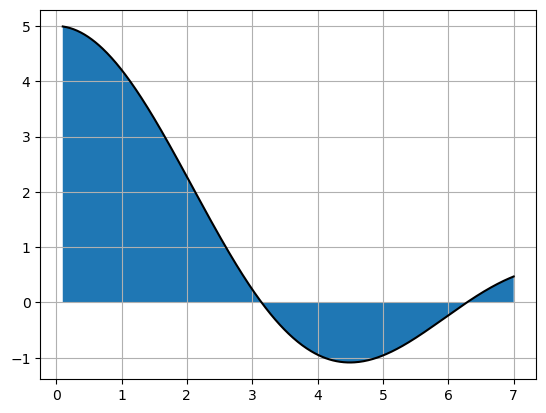

In [58]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(a,b,n)
y1 = fun1(x)
plt.figure()
plt.plot(x1,y1, "k",)
plt.fill_between(x1,y1)
plt.grid()

### Integración Monte Carlo tipo 1 - Problema 2
$$ f_1(x) = \sin{(x)} e^{-x} $$
$$ f_2(x) = \frac{x}{10} $$

Dadas $f_1$ y $f_2$, ¿cuál es el área que hay entre las dos curvas en un intervalo de $[0, 4]$? (Aproxima los cruces)

In [48]:
import matplotlib.pyplot as plt
import numpy as np

n1 = 500
a1 = 0
b1 = 4
def fun3(x):
    return (np.sin(x)*np.exp(-x))


def fun4(x):
    return (x/10)

In [50]:
def montecarlo_tipo1(f,a1,b1,n1):
    u1 = np.random.uniform(a1,b1,n1)
    return np.mean(f(u1))*(b1-a1)

In [52]:
montecarlo_tipo1(fun3,a1,b1,n1)

0.5527449310370313

In [54]:
montecarlo_tipo1(fun4,a1,b1,n1)

0.7485714781083125

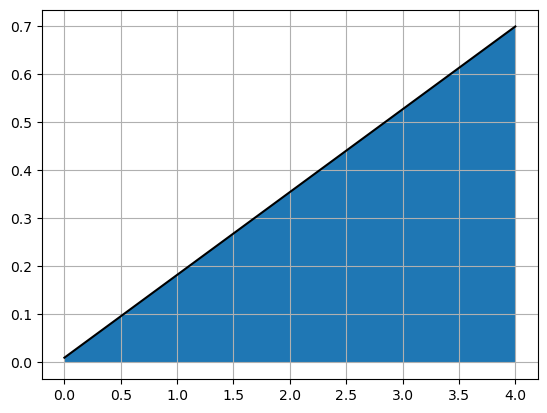

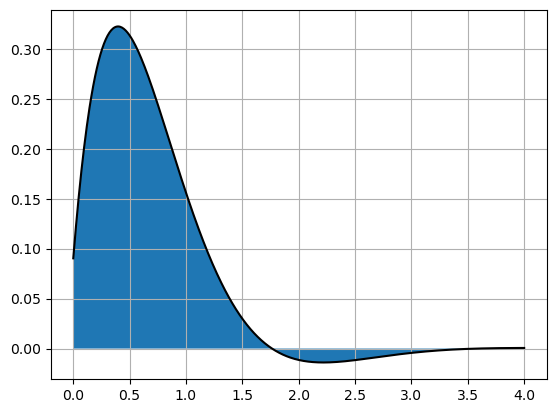

In [66]:
import matplotlib.pyplot as plt
import numpy as np

x2 = np.linspace(a1,b1,n1)
y2 = fun4(x)
plt.figure()
plt.plot(x2,y2, "k",)
plt.fill_between(x2,y2)
plt.grid()

x2 = np.linspace(a1,b1,n1)
y2 = fun3(x)
plt.figure()
plt.plot(x2,y2, "k",)
plt.fill_between(x2,y2)
plt.grid()

---
### Integración Monte Carlo tipo 2 - Problema 1

Se tienen las siguientes desigualdades:

1.
$$ ((\frac{x}{4})^2 + (\frac{y-1}{2.5})^2 < 1)\ \& \ ((x+1.5)^2 + (y-1)^2 > 0.2) \ \& \ ((x-1.5)^2 + (y-1)^2 > 0.2) $$


2. $$ (x+3)^2 + (y-4)^2 < 2 $$


3. $$ (x-3)^2 + (y-4)^2 < 2 $$

4. $$ x^2 + (\frac{y+5}{2})^2 < 8 $$

1. Crea una función de Python para cada desigualdad.

In [68]:
def fun_1(x,y):
    return ((x/4)**2 + ((y-1)/(2.5))**2 <1) & ((x + 1.5)**2 + (y-1)**2 > 0.2) & ((x-1.5)**2 + (y-1)**2 > 0.2)

def fun_2(x,y):
    return (x+3)**2 + (y-4)**2 < 2

def fun_3(x,y):
    return (x-3)**2 + (y-4)**2 < 2

def fun_4(x,y):
    return x**2 + ((y+5)/2)**2 < 8

2. Crea una función que agrupe estas desigualdades (utiliza el operador `|` para unir las desigualdades)

In [122]:
def def_agrupadas(x,y):
    return fun_1(x, y) | fun_2(x, y) | fun_3(x, y) | fun_4(x, y)




3. Encuentra los límites de integración

<Figure size 640x480 with 0 Axes>

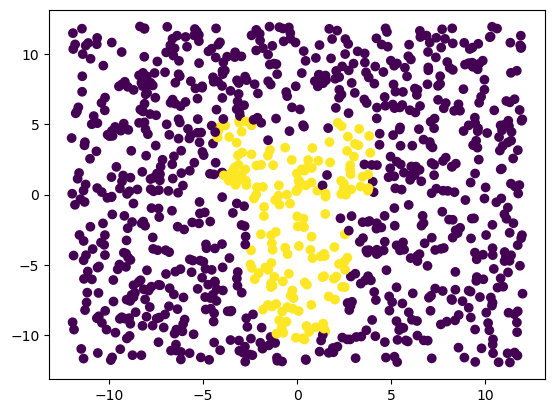

<Figure size 640x480 with 0 Axes>

In [132]:
import matplotlib.pyplot as plt

ax = -12
bx = 12
ay = -12
by = 12
n = 1000
x = np.random.uniform(ax,bx,n)
y = np.random.uniform(ay,by,n)
plt.scatter(x,y,c=def_agrupadas(x, y))
plt.figure()  

4. Aproxima el área de la región descrita por la agrupación de las desigualdades con 1 millón de puntos.

In [161]:
import numpy as np
n3 = 1000000
def montecarlo_tipo2(region,ax,bx,ay,by,n3):
    x = np.random.uniform(ax,bx,n3)
    y = np.random.uniform(ay,by,n3)
    AR = (bx - ax) * (by - ay)
    return np.mean(region(x,y))*AR

In [163]:
montecarlo_tipo2(def_agrupadas,ax,bx,ay,by, n3)

86.567616

5. ¿Cuál es el error relativo?

In [165]:
def error(f,ax,bx,ay,by,n3):
    AD = montecarlo_tipo2(def_agrupadas,ax,bx,ay,by, n3)
    AR = (bx - ax) * (by - ay)
    Crel = np.sqrt((1-AD/AR)/(AD/AR))
    erel = np.log10(Crel)-np.log10(n3)/2
    return erel
    

In [167]:
error(def_agrupadas,ax,bx,ay,by,n3)

-2.624244300517435

### Integración Monte Carlo tipo 2 - Problema 2

Se quiere calcular el volumen de una alberca donde su superficie está dada por la siguiente desigualdad:
$$ (x^2 + (\frac{y}{2})^2 \leq 1)\ | \ ((x-1)^2 + (y+2)^2 \leq 2) $$

1. Define una función en Python para la desigualdad y utilízala para encontrar límites de integración adecuados para esta superficie.

<Figure size 640x480 with 0 Axes>

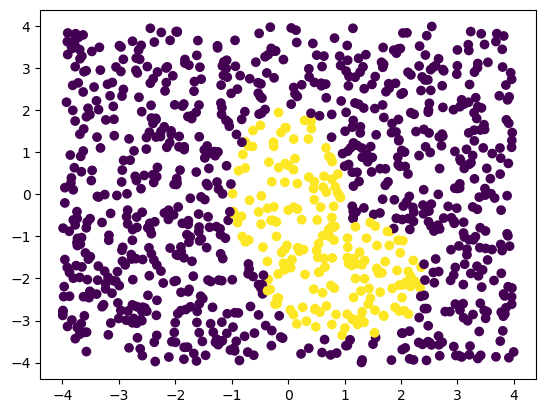

<Figure size 640x480 with 0 Axes>

In [177]:
def fun_7(x,y):
    return (x**2 + (y/2)**2 <= 1) | ((x-1)**2 + (y+2)**2 <= 2)

import matplotlib.pyplot as plt

ax = -4
bx = 4
ay = -4
by = 4
n = 1000
x = np.random.uniform(ax,bx,n)
y = np.random.uniform(ay,by,n)
plt.scatter(x,y,c=fun_7(x, y))
plt.figure()  

La profundidad de la alberca debe ser de $1.35$ metros. En otras palabras

$$ (z \leq 0)\ \& \ (z \geq -1.35)$$

2. Define una función para esta desigualdad de profundidad.

In [179]:
def profundidad(z):
    return (z <= 0) & (z >= -1.35)

3. Define una función que agrupe estas desigualdades (utiliza el operador `&` para unir las desigualdades)

In [191]:
az = -1
bz = 1
def agrupadas2(x,y,z):
    return fun_7(x,y) & profundidad(z)
    

4. Aproxima el volumen.

In [193]:
n4 = 1000000
def montecarlo_tipo3(region,ax,bx,ay,by,az,bz,n4):
    x = np.random.uniform(ax,bx,n4)
    y = np.random.uniform(ay,by,n4)
    z = np.random.uniform(az,bz,n4)
    AR = (bx - ax) * (by - ay) * (bz - az)
    return np.mean(region(x,y,z))*AR

In [195]:
montecarlo_tipo3(agrupadas2,ax,bx,ay,by,az,bz,n4)

11.40224